In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset.shape

(7973, 31)

In [ ]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

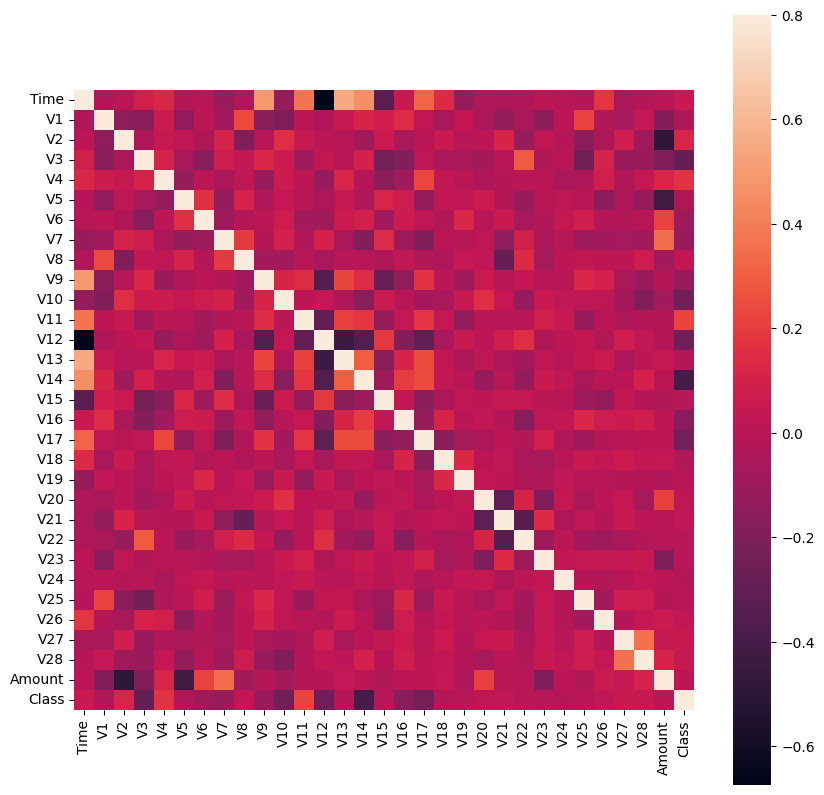

In [ ]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()


In [ ]:
len(dataset[dataset['Class']==0])

7947

In [ ]:
len(dataset[dataset['Class']==1])

25

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
X_train = dataset.iloc[: , :-1].values
y_train = dataset.iloc[: , -1].values

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)

In [ ]:
x_res, y_res = ros.fit_resample(x, y)

In [ ]:
x.shape

(150, 4)

In [ ]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0: 50, 1: 50, 2: 50})
Counter({0: 50, 1: 50, 2: 50})


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
y_train.shape

(105,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
n_errors = (y_pred != y_test).sum()


In [ ]:
y_test.shape

(45,)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test, y_pred, average='micro')

1.0

In [ ]:
from sklearn.metrics import recall_score


In [ ]:
recall_score(y_test, y_pred, average='macro')

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

